# Governance Dataset:
The governance dataset has information about not-for-profits such as the number of voting memters and volunteers.  Additionally, it includes a number of boolean datatype fields related to policies or disclosures such as a conflict of interest policy or a conflict disclosure.  The evidence of robust policies and disclosure practices are indicators of organizations with strong internal controls.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## IMPORT DATA

In [8]:
# examine all fields
df_all_fields = pd.read_csv('02.data/primary_raw_datasets/Open990_Governance_Snack_Set_Public_2019-01-15.csv', nrows=5)

In [9]:
df_all_fields.head()

,ein,name_org,tax_date_begin,tax_date_end,tax_yr,doing_business_as,phone,website,address,city,state,country,zip,org_form.association,org_form.corp,org_form.other_form,org_form.other_form_desc,org_form.trust,formation_yr,grp_exempt_num,state_legaldomicile,grp_return,grp_subs_all_incl,exempt_status.501c3,exempt_status.501c_any,exempt_status.501c_txt,gross_receipts,ntee_code_nccs,ntee_description_nccs,discontinue_dispose25,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_giftsgrants_tot_prioryr,rev_prgmservice_prioryr,rev_investmt_prioryr,rev_other_prioryr,rev_tot_prioryr,grants_expense_tot_prioryr,benefits_expense_tot_prioryr,salaries_expense_tot_prioryr,fundraiseservfee_expense_tot_prioryr,fundraise_expense_tot_curyr,other_expense_tot_prioryr,expense_tot_prioryr,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_giftsgrants_tot_curyr,rev_prgmservice_curyr,rev_investmt_curyr,rev_other_curyr,rev_tot_curyr,grants_expense_tot_curyr,benefits_expense_tot_curyr,salaries_expense_tot_curyr,fundraiseservfee_expense_tot_curyr,other_expense_tot_curyr,expense_tot_curyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,operate_hospfacility,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,policies_ref_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,joint_venture_policy,forms_ownwebsite,comp_currkeypersons_tot,cash_noninterest_endyr,savingtempcash_endyr,pledges_net_endyr,accountreceivable_net_endyr,invest_publicsec_endyr,invest_othersec_endyr,invest_prog_endyr,asset_intangible_endyr,asset_unrestrictnet_endyr,asset_temprestrictnet_endyr,asset_permrestrictnet_endyr,record_id,schema_version,irs_efile_id,random_string
0,391546606,DAYSTAR INC,2017-01-01,2017-12-31,2017,NaN,+1 (414) 385-0334,WWW.DAYSTARINC.ORG,PO BOX 2130,MILWAUKEE,WI,NaN,532012130,NaN,True,NaN,NaN,NaN,1986,NaN,WI,no,NaN,True,NaN,NaN,333897,NaN,NaN,NaN,9,9,8,25.0,4280,0.0,207987,6092,1,-143,213937,0.0,0.0,140200,0.0,21971,92928,233128,-19191,316735,288974,27761,260639,8695,0,4280,273614,0,0,115568,0,115084,230652,42962,325654,254931,70723,no,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN,NaN,16375.0,27988,201.0,17998.0,6009.0,NaN,NaN,NaN,NaN,70723.0,0.0,NaN,391546606_201712,2017v2.2,201831219349300733,MTA0MDA1NjUyMDM1ODQ2NDI1MQ
1,640901077,HERNANDO MAIN STREETCHAMBER OF COMMERCE,2012-01-01,2012-12-31,2012,NaN,+1 (662) 429-9055,www.hernandoms.org,2440 HIGHWAY 51 SOUTH,HERNANDO,MS,NaN,38632,NaN,True,NaN,NaN,NaN,1973,NaN,MS,no,no,NaN,True,6.0,252283,S41,Promotion of Business,NaN,15,15,4,NaN,0,NaN,92322,4740,649,18732,116443,NaN,NaN,87063,NaN,-103606,81181,168244,-51801,89517,7271,82246,81249,40715,296,26417,148677,965,0,83768,0,76994,161727,-13050,72742,3546,69196,no,no,no,no,yes,yes,yes,yes,no,no,no,NaN,yes,yes,yes,yes,no,no,no,no,no,NaN,NaN,45010.0,30403,34216.0,0.0,6738.0,0.0,0.0,0.0,0.0,69196.0,NaN,NaN,640901077_201212,2012v2.0,201321359349303692,MTA0MDA1NzYwNzM0ODkyMTY0Ng
2,522113016,MARYLAND CAPITAL ENTERPRISES INC,2014-10-01,2015-09-30,2015,NaN,+1 (410) 546-1900,WWW.MARYLANDCAPITAL.ORG,PO BOX 213,SALISBURY,MD,NaN,21802,NaN,True,NaN,NaN,NaN,1991,NaN,MD,no,NaN,True,NaN,NaN,1406736,P51,"Financial Counseling, Money Management",NaN,15,15,16,0.0,0,0.0,1324919,0,170539,59726,1555184,0.0,0.0,337154,0.0,0,589747,926901,628283,4376943,2518702,1858241,1091077,0,257136,51865,1400078,0,0,517577,0,386300,903877,496201,5435095,3080653,2354442,no,no,no,no,no,no,no,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,NaN,NaN,28139.0,486696,802607.0,119721.0,NaN,NaN,NaN,NaN,NaN,1915868.0,NaN,438574.0,522113016_201509,2014v6.0,201622259349303247,MTA0MDA1NzYyMjEwNzcwOTk1N

In [10]:
# identify governance columns of interest to me
list(enumerate(df_all_fields.columns))[68:89]

[(68, 'relationsamongemployees'),
 (69, 'delegate_management'),
 (70, 'material_diversion'),
 (71, 'memb_or_stockholder'),
 (72, 'memb_elect_board'),
 (73, 'decisions_outside_board'),
 (74, 'govern_body_minutes'),
 (75, 'committee_minutes'),
 (76, 'no_officer_address'),
 (77, 'local_chapt'),
 (78, 'policies_ref_chapt'),
 (79, '990_to_members'),
 (80, 'conflict_interest_policy'),
 (81, 'conflict_disclosure'),
 (82, 'enforce_conflict_policy'),
 (83, 'whistleblower_policy'),
 (84, 'doc_retention_policy'),
 (85, 'ceo_comp_review'),
 (86, 'officer_comp_review'),
 (87, 'in_joint_venture'),
 (88, 'joint_venture_policy')]

In [46]:
# add together columns selected by index and those manually selected
cols = list(df_all_fields.iloc[:, 68:89].columns) + ['ein',
  'tax_yr',
   'voting_memb_ct',
   'voting_indepmemb_ct',
   'employee_tot_ct',
   'volunteer_tot_ct',
   'salaries_expense_tot_curyr']

In [47]:
# import only fields of interest to me
df = pd.read_csv('02.data/primary_raw_datasets/Open990_Governance_Snack_Set_Public_2019-01-15.csv', usecols=cols)

In [48]:
df.shape

(1453208, 28)

In [49]:
df.head(5)

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,policies_ref_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,joint_venture_policy
0,391546606,2017,9,9,8,25.0,115568,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN
1,640901077,2012,15,15,4,NaN,83768,no,no,no,yes,yes,yes,yes,no,no,no,NaN,yes,yes,yes,yes,no,no,no,no,no,NaN
2,522113016,2015,15,15,16,0.0,517577,no,no,no,no,no,no,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,NaN
3,454957549,2016,4,0,12,NaN,79260,no,no,no,no,no,no,no,no,no,no,NaN,no,no,no,no,no,no,no,no,no,NaN
4,210502065,2017,28,28,3,0.0,79349,no,no,no,no,yes,no,yes,yes,no,no,NaN,yes,no,NaN,NaN,no,no,yes,no,no,NaN


## CLEAN/ORGANIZE DATA

In [101]:
# examine distribution by years
df.tax_yr.value_counts().sort_index()

2016    237448
2015    226022
2014    208950
2013    189195
2017    178537
2012    169291
2011    138173
2010     97353
2018      8239
Name: tax_yr, dtype: int64

In [52]:
# although I'm only focusing on 2017 in the executive compensation dataset
# only including 2017 here caused me to miss about 3/4 of
# executive compensation payments
# including two prior years allows me to match up with almost 
# all executive compensation payments
df = df[(df.tax_yr == 2017) |
       (df.tax_yr == 2016) |
       (df.tax_yr == 2015)]

In [53]:
df.shape

(642007, 28)

In [54]:
# which fields are more than 60% null?
(df.isnull().mean() * 100)[(df.isnull().mean() * 100) > 60].index

Index(['policies_ref_chapt', 'joint_venture_policy'], dtype='object')

In [55]:
# drop columns that are mostly null
df.drop(['policies_ref_chapt', 'joint_venture_policy'], axis=1, inplace=True)

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
# examine data types of columns
# many of the binary colums are object
# I need to convert to bool
df.dtypes

ein                             int64
tax_yr                          int64
voting_memb_ct                  int64
voting_indepmemb_ct             int64
employee_tot_ct                 int64
volunteer_tot_ct              float64
salaries_expense_tot_curyr      int64
relationsamongemployees        object
delegate_management            object
material_diversion             object
memb_or_stockholder            object
memb_elect_board               object
decisions_outside_board        object
govern_body_minutes            object
committee_minutes              object
no_officer_address             object
local_chapt                    object
990_to_members                 object
conflict_interest_policy       object
conflict_disclosure            object
enforce_conflict_policy        object
whistleblower_policy           object
doc_retention_policy           object
ceo_comp_review                object
officer_comp_review            object
in_joint_venture               object
dtype: objec

In [57]:
# convert object columns to boolean
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column] == 'yes'

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
# verify results
df.dtypes

ein                             int64
tax_yr                          int64
voting_memb_ct                  int64
voting_indepmemb_ct             int64
employee_tot_ct                 int64
volunteer_tot_ct              float64
salaries_expense_tot_curyr      int64
relationsamongemployees          bool
delegate_management              bool
material_diversion               bool
memb_or_stockholder              bool
memb_elect_board                 bool
decisions_outside_board          bool
govern_body_minutes              bool
committee_minutes                bool
no_officer_address               bool
local_chapt                      bool
990_to_members                   bool
conflict_interest_policy         bool
conflict_disclosure              bool
enforce_conflict_policy          bool
whistleblower_policy             bool
doc_retention_policy             bool
ceo_comp_review                  bool
officer_comp_review              bool
in_joint_venture                 bool
dtype: objec

In [59]:
# examine for null values by percent
df.isnull().mean() * 100

ein                            0.000000
tax_yr                         0.000000
voting_memb_ct                 0.000000
voting_indepmemb_ct            0.000000
employee_tot_ct                0.000000
volunteer_tot_ct              26.682731
salaries_expense_tot_curyr     0.000000
relationsamongemployees        0.000000
delegate_management            0.000000
material_diversion             0.000000
memb_or_stockholder            0.000000
memb_elect_board               0.000000
decisions_outside_board        0.000000
govern_body_minutes            0.000000
committee_minutes              0.000000
no_officer_address             0.000000
local_chapt                    0.000000
990_to_members                 0.000000
conflict_interest_policy       0.000000
conflict_disclosure            0.000000
enforce_conflict_policy        0.000000
whistleblower_policy           0.000000
doc_retention_policy           0.000000
ceo_comp_review                0.000000
officer_comp_review            0.000000


In [60]:
# replace null volunteers with zero
# change data type to int
df.volunteer_tot_ct.fillna(0, inplace=True)
df.volunteer_tot_ct = df.volunteer_tot_ct.astype(int)

C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\mrkjh\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
df.head()

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture
0,391546606,2017,9,9,8,25,115568,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
2,522113016,2015,15,15,16,0,517577,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,False
3,454957549,2016,4,0,12,0,79260,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,210502065,2017,28,28,3,0,79349,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,False,False
5,473214712,2016,4,4,0,4,0,False,False,False,False,False,False,True,True,False,False,False,True,True,True,True,True,False,False,False


In [62]:
df.shape

(642007, 26)

In [63]:
# since I have included multiple years
# select only the latest governance data
# based on ein number
# delete the rest
df = df.sort_values(['ein', 'tax_yr'], ascending=False).drop_duplicates('ein')

In [64]:
df.shape

(269928, 26)

## EDA

In [65]:
# responses to governance questions
list(enumerate(df.columns))

[(0, 'ein'),
 (1, 'tax_yr'),
 (2, 'voting_memb_ct'),
 (3, 'voting_indepmemb_ct'),
 (4, 'employee_tot_ct'),
 (5, 'volunteer_tot_ct'),
 (6, 'salaries_expense_tot_curyr'),
 (7, 'relationsamongemployees'),
 (8, 'delegate_management'),
 (9, 'material_diversion'),
 (10, 'memb_or_stockholder'),
 (11, 'memb_elect_board'),
 (12, 'decisions_outside_board'),
 (13, 'govern_body_minutes'),
 (14, 'committee_minutes'),
 (15, 'no_officer_address'),
 (16, 'local_chapt'),
 (17, '990_to_members'),
 (18, 'conflict_interest_policy'),
 (19, 'conflict_disclosure'),
 (20, 'enforce_conflict_policy'),
 (21, 'whistleblower_policy'),
 (22, 'doc_retention_policy'),
 (23, 'ceo_comp_review'),
 (24, 'officer_comp_review'),
 (25, 'in_joint_venture')]

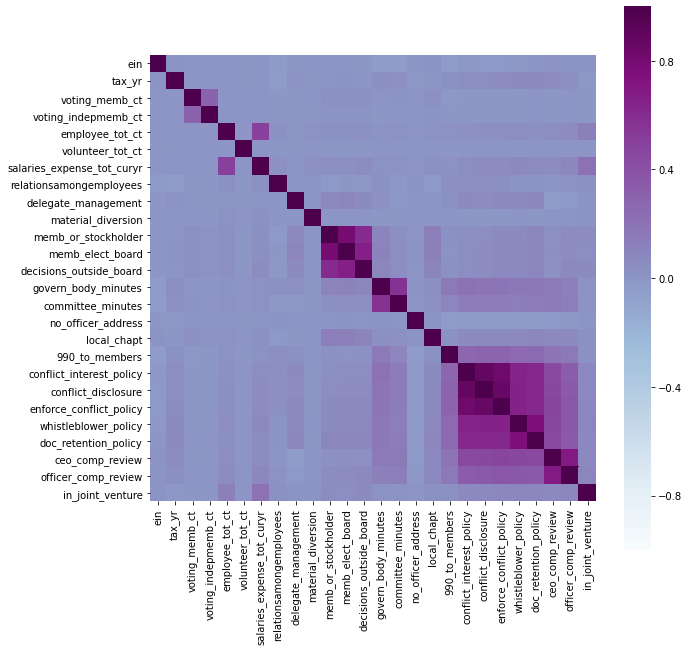

In [66]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))

ax = sns.heatmap(df.corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, 
                 annot=False, 
                 cmap='BuPu')

## CLUSTERING ANALYSIS

In [4]:
# standard scale data before modeling
# X = pd.get_dummies(df)

# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

In [3]:
# # find best DBSCAN parameters
# cluster_count = []
# sil_score = []
# eps_ = []
# min_samples_ = []

# for eps in [.1, .5, 1]:
#     for min_samples in [5, 10, 15]:
    
#         # Defining the agglomerative clustering
#         dbscan_cluster = DBSCAN(eps=eps, min_samples=min_samples)

#         # Fit model
#         clusters = dbscan_cluster.fit_predict(X_std)
        
#         # capture cluster count
#         cluster_count.append(len(set(clusters)) - (1 if -1 in clusters else 0))
        
#         # capture model fit
#         if pd.Series(clusters).nunique() > 1:
#             sil_score.append(round(metrics.silhouette_score(X_std, clusters, metric='euclidean'), 3))
#         else:
#             sil_score.append(np.nan)
        
#         # record parameter values
#         eps_.append(eps)
#         min_samples_.append(min_samples)

In [2]:
# tabulate param results from above
# sort by silhouette score & cluster count
# cluster_scores = pd.DataFrame(list(list(zip(sil_score, cluster_count, eps_, min_samples_))), 
#             columns=['sil_score', 'cluster_count', 'eps', 'min_samples']) \
#         .sort_values(by=['sil_score', 'cluster_count'], ascending=False)

# cluster_scores

In [1]:
# plot silhouette score and cluster count
# fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10, 6))

# cluster_scores.loc[:,['sil_score']] \
#     .plot(kind='bar', color='green', legend=False, ax=ax0)
# ax0.set_title('SILHOUETTE SCORE', fontsize=15)


# cluster_scores.loc[:,['cluster_count']] \
#     .plot(kind='bar', legend=False, ax=ax1);
# ax1.set_title('CLUSTER COUNT', fontsize=15)

# plt.xticks(rotation=1);

## EXPORT CLUSTER LABELS

In [117]:
# df['ein'].to_csv('data_sets/ein.csv', index=False, header=True)

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture
367394,996086871,2017,2,0,0,0,False,True,False,False,False,False,True,False,False,False,True,True,True,True,False,True,True,False,False
1063015,996078252,2016,4,2,0,0,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
224160,996064620,2016,3,3,0,0,False,False,False,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,False
30093,996057064,2016,3,3,0,3,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
474326,996048710,2016,3,3,0,0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False


In [41]:
df.loc[:,'ein']

367394     996086871
1063015    996078252
224160     996064620
30093      996057064
474326     996048710
             ...    
1368372     10019705
111381      10018930
1054428     10018927
168672      10018923
526754      10018922
Name: ein, Length: 269928, dtype: int64

In [50]:
dfdd

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,policies_ref_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,joint_venture_policy
0,391546606,2017,9,9,8,25.0,115568,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN
1,640901077,2012,15,15,4,NaN,83768,no,no,no,yes,yes,yes,yes,no,no,no,NaN,yes,yes,yes,yes,no,no,no,no,no,NaN
2,522113016,2015,15,15,16,0.0,517577,no,no,no,no,no,no,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,NaN
3,454957549,2016,4,0,12,NaN,79260,no,no,no,no,no,no,no,no,no,no,NaN,no,no,no,no,no,no,no,no,no,NaN
4,210502065,2017,28,28,3,0.0,79349,no,no,no,no,yes,no,yes,yes,no,no,NaN,yes,no,NaN,NaN,no,no,yes,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453203,203670252,2015,15,15,8,25.0,468954,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN
1453204,202721328,2016,3,3,0,0.0,713328,no,no,no,no,no,no,yes,no,no,no,NaN,yes,yes,yes,yes,yes,yes,no,yes,no,NaN
1453205,202529364,2018,3,3,0,NaN,0,no,no,no,no,no,no,yes,yes,no,no,NaN,no,no,NaN,NaN,no,no,no,no,no,NaN
1453206,380888265,2012,6,3,5,NaN,102878,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,no,NaN,NaN,no,no,no,no,no,NaN


### Export Continuous Governance Data for

In [67]:
pd.concat([df.loc[:, 'voting_memb_ct' : 'salaries_expense_tot_curyr'],
           df.loc[:,'ein']], axis=1)

,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,ein
367394,2,0,0,0,140000,996086871
1063015,4,2,0,0,0,996078252
224160,3,3,0,0,281890,996064620
30093,3,3,0,3,0,996057064
474326,3,3,0,0,104995,996048710
...,...,...,...,...,...,...
1368372,11,9,6,9,78462,10019705
111381,60,56,10,0,247387,10018930
1054428,9,9,10,0,58990,10018927
168672,10,0,12,0,74592,10018923


In [45]:
# export continuous feature data to use for modeling
pd.concat([df.loc[:, 'voting_memb_ct' : 'salaries_expense_tot_curyr'],
           df.loc[:,'ein']], axis=1).to_csv('02.data/gov_continuous.csv', index=False, header=True)